In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import PIL
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [2]:
!rm -rf images
IMAGE_DIR = 'images'
!mkdir {IMAGE_DIR}

!wget -q -O ./images/daisy.zip https://github.com/PriyaVellanki/flower_classification/raw/main/data/daisy.zip
!wget -q -O ./images/dandelion.zip https://github.com/PriyaVellanki/flower_classification/raw/main/data/dandelion.zip

In [3]:
# !mkdir ./images/daisy
!unzip ./images/daisy.zip -d ./images/

!unzip ./images/dandelion.zip -d ./images/

Archive:  ./images/daisy.zip
   creating: ./images/daisy/
  inflating: ./images/__MACOSX/._daisy  
  inflating: ./images/daisy/14167534527_781ceb1b7a_n.jpg  
  inflating: ./images/__MACOSX/daisy/._14167534527_781ceb1b7a_n.jpg  
  inflating: ./images/daisy/34718882165_68cdc9def9_n.jpg  
  inflating: ./images/__MACOSX/daisy/._34718882165_68cdc9def9_n.jpg  
  inflating: ./images/daisy/5512287917_9f5d3f0f98_n.jpg  
  inflating: ./images/__MACOSX/daisy/._5512287917_9f5d3f0f98_n.jpg  
  inflating: ./images/daisy/476857510_d2b30175de_n.jpg  
  inflating: ./images/__MACOSX/daisy/._476857510_d2b30175de_n.jpg  
  inflating: ./images/daisy/33837577463_1ae52a3726_n.jpg  
  inflating: ./images/__MACOSX/daisy/._33837577463_1ae52a3726_n.jpg  
  inflating: ./images/daisy/34638378196_216d5bbc2e_n.jpg  
  inflating: ./images/__MACOSX/daisy/._34638378196_216d5bbc2e_n.jpg  
  inflating: ./images/daisy/8008258043_5457dd254b_n.jpg  
  inflating: ./images/__MACOSX/daisy/._8008258043_5457dd254b_n.jpg  
  infl

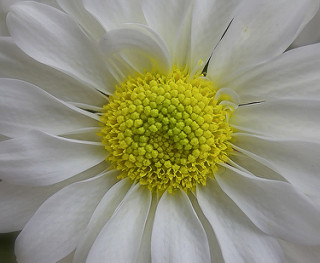

In [4]:
path = './images/daisy'
name = '100080576_f52e8ee070_n.jpg'
full_name = f'{path}/{name}'
load_img(full_name)

In [5]:
img = load_img(full_name, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

# **Pre-trained convolutional neural networks**

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 1s 0us/step


In [29]:
X = np.array([x])

In [30]:
X.shape

(1, 299, 299, 3)

In [31]:
X = preprocess_input(X)

In [32]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [33]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n11939491', 'daisy', 0.929601),
  ('n02190166', 'fly', 0.0015900444),
  ('n02206856', 'bee', 0.0015062926),
  ('n02177972', 'weevil', 0.0005476813),
  ('n02165456', 'ladybug', 0.00047341446)]]

In [8]:
import os
import shutil
def cleanup():
  os.listdir('./images')
  shutil.rmtree('./images/.ipynb_checkpoints')

In [10]:
!rm -rf ./images/__MACOSX

# **Transfer Learning**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './images/',
    target_size=(150, 150),
    batch_size=32
)

Found 1308 images belonging to 2 classes.


In [12]:
train_ds.class_indices

{'daisy': 0, 'dandelion': 1}

In [13]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='./images/daisy'
FLOWER_DANDI_DIR='./images/dandelion'

In [101]:
# import glob
# daisy = glob.glob('./images/daisy/*.jpg')
# dandelion = glob.glob('./images/dandelion/*.jpg')



# data = []
# labels = []
# for i in daisy:
#   image=tf.keras.preprocessing.image.load_img(i,target_size= (150,150))
#   image=np.array(image)
#   data.append(image)
#   labels.append(0)
# for i in dandelion:
#   image=tf.keras.preprocessing.image.load_img(i, target_size= (150,150))
#   image=np.array(image)
#   data.append(image)
#   labels.append(1)

In [102]:
# data = np.array(data)
# labels = np.array(labels)


In [103]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
#                                                 random_state=42)

In [72]:
image_generator = ImageDataGenerator(validation_split=0.2)

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(160, 160),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(160, 160),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [14]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [15]:
base_model=MobileNet(input_shape=(160, 160, 3),
                     weights='imagenet',
                     include_top=False


)
base_model.trainable = False
inputs = keras.Input(shape=(160, 160, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

17225924/17225924 [==============================] - 0s 0us/step


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenet_1.00_160 (Functi  (None, 5, 5, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2)                 2050      
                                                                 
Total params: 3230914 (12.32 MB)
Trainable params: 2050 (8.01 KB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


In [19]:
def mobilenet_model(learning_rate=0.01):
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(160, 160, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(160, 160, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(2)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [26]:
scores = {}

for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
    print(learning_rate)

    model = mobilenet_model(learning_rate=learning_rate)
    history = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)
    scores[learning_rate] = history.history

    print()
    print()

0.0001
Epoch 1/20
33/33 [==============================] - 7s 138ms/step - loss: 0.6955 - accuracy: 0.5941 - val_loss: 0.7240 - val_accuracy: 0.5670
Epoch 2/20
33/33 [==============================] - 2s 70ms/step - loss: 0.6609 - accuracy: 0.6266 - val_loss: 0.7004 - val_accuracy: 0.5900
Epoch 3/20
33/33 [==============================] - 2s 67ms/step - loss: 0.6380 - accuracy: 0.6543 - val_loss: 0.6835 - val_accuracy: 0.6130
Epoch 4/20
33/33 [==============================] - 2s 69ms/step - loss: 0.6225 - accuracy: 0.6695 - val_loss: 0.6721 - val_accuracy: 0.6130
Epoch 5/20
33/33 [==============================] - 2s 69ms/step - loss: 0.6074 - accuracy: 0.6628 - val_loss: 0.6596 - val_accuracy: 0.6360
Epoch 6/20
33/33 [==============================] - 4s 113ms/step - loss: 0.5973 - accuracy: 0.6781 - val_loss: 0.6523 - val_accuracy: 0.6513
Epoch 7/20
33/33 [==============================] - 2s 72ms/step - loss: 0.5861 - accuracy: 0.6905 - val_loss: 0.6429 - val_accuracy: 0.6552
Epoc

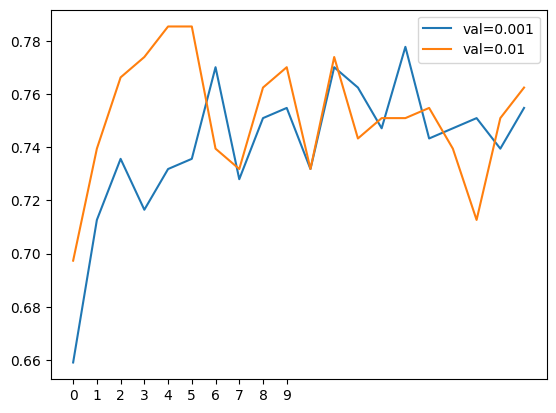

In [32]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [31]:
# del scores[0.0001]
del scores[0.1]

In [ ]:
learning_rate = 0.01


# **Adding More Layers**

In [33]:
def mobilenet_model(learning_rate=0.01,size=1024):
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(160, 160, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(160, 160, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size,activation='relu')(vectors)
    outputs = keras.layers.Dense(2)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [74]:
learning_rate = 0.01

scores = {}

# List of inner layer sizes
sizes = [64,128,256,512,1024]
# Create checkpoint to save best model for version 3
filepath = './mobilenet_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')
model = mobilenet_model(learning_rate=learning_rate, size=256)
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset,callbacks=[checkpoint])
scores[size] = history.history

Epoch 1/10
33/33 [==============================] - 6s 102ms/step - loss: 2.0769 - accuracy: 0.5912 - val_loss: 0.6075 - val_accuracy: 0.6782
Epoch 2/10
33/33 [==============================] - 2s 72ms/step - loss: 0.5677 - accuracy: 0.7240 - val_loss: 0.5518 - val_accuracy: 0.7356
Epoch 3/10
33/33 [==============================] - 3s 76ms/step - loss: 0.5010 - accuracy: 0.7650 - val_loss: 0.5147 - val_accuracy: 0.7625
Epoch 4/10
33/33 [==============================] - 2s 68ms/step - loss: 0.4470 - accuracy: 0.7870 - val_loss: 0.5537 - val_accuracy: 0.7088
Epoch 5/10
33/33 [==============================] - 3s 81ms/step - loss: 0.3942 - accuracy: 0.8300 - val_loss: 0.5099 - val_accuracy: 0.7625
Epoch 6/10
33/33 [==============================] - 3s 82ms/step - loss: 0.3783 - accuracy: 0.8338 - val_loss: 0.5125 - val_accuracy: 0.7625
Epoch 7/10
33/33 [==============================] - 2s 71ms/step - loss: 0.4105 - accuracy: 0.8080 - val_loss: 0.6024 - val_accuracy: 0.6667
Epoch 8/10
3

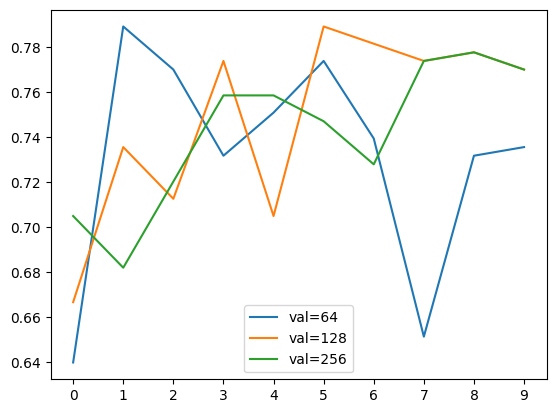

In [45]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % size))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

In [44]:
size = 256
del scores[1024]

# **Regularization and drop out**

In [52]:
def mobilenet_model(learning_rate=0.01,size=1024,drop_rate=0.2):
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(160, 160, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(160, 160, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size,activation='relu')(vectors)
    dropout = keras.layers.Dropout(drop_rate)(inner)
    outputs = keras.layers.Dense(2)(dropout)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [53]:
learning_rate = 0.01
size = 256

# hashmap to store results
scores = {}

# various drop rate list
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)

    model = mobilenet_model(learning_rate=learning_rate,size=size,drop_rate=droprate)


    history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
33/33 [==============================] - 5s 91ms/step - loss: 2.5637 - accuracy: 0.6208 - val_loss: 0.5456 - val_accuracy: 0.7586
Epoch 2/30
33/33 [==============================] - 2s 71ms/step - loss: 0.4543 - accuracy: 0.7870 - val_loss: 0.5254 - val_accuracy: 0.7433
Epoch 3/30
33/33 [==============================] - 2s 70ms/step - loss: 0.4027 - accuracy: 0.8176 - val_loss: 0.5016 - val_accuracy: 0.7739
Epoch 4/30
33/33 [==============================] - 2s 69ms/step - loss: 0.4663 - accuracy: 0.7708 - val_loss: 0.5590 - val_accuracy: 0.7241
Epoch 5/30
33/33 [==============================] - 2s 74ms/step - loss: 0.3696 - accuracy: 0.8357 - val_loss: 0.5334 - val_accuracy: 0.7854
Epoch 6/30
33/33 [==============================] - 3s 95ms/step - loss: 0.3325 - accuracy: 0.8606 - val_loss: 0.5264 - val_accuracy: 0.7816
Epoch 7/30
33/33 [==============================] - 2s 72ms/step - loss: 0.2819 - accuracy: 0.8758 - val_loss: 0.7027 - val_accuracy: 0.7586
Epoch 8/3

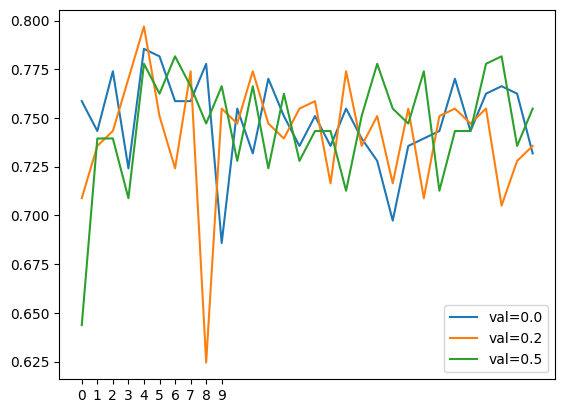

In [58]:
for dr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % dr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % dr))

plt.xticks(np.arange(10))
plt.legend()

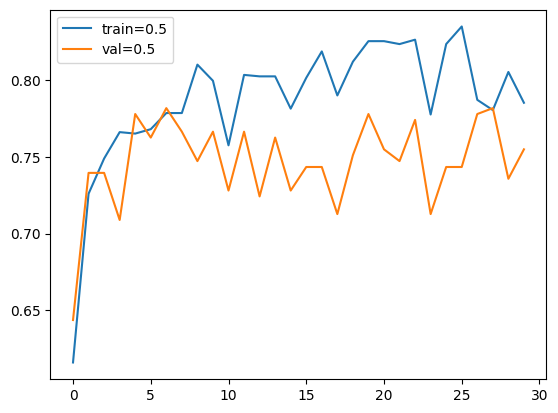

In [65]:
for dr, hist in scores.items():
    if dr == 0.5:
      plt.plot(hist['accuracy'], label=('train=%s' % dr))
      plt.plot(hist['val_accuracy'], label=('val=%s' % dr))

      # plt.xticks(np.arange(10))
      plt.legend()

In [73]:
learning_rate = 0.01
size = 256

# hashmap to store results
scores = {}

filepath = './mobilent_v2_{epoch:02d}_{val_accuracy:.3f}.h5'


checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

model = mobilenet_model(learning_rate=learning_rate, size=256,drop_rate=0.2)
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset,callbacks=[checkpoint])
scores[size] = history.history





Epoch 1/10
33/33 [==============================] - 5s 98ms/step - loss: 2.4898 - accuracy: 0.5960 - val_loss: 0.5822 - val_accuracy: 0.6858


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
33/33 [==============================] - 3s 97ms/step - loss: 0.5320 - accuracy: 0.7364 - val_loss: 0.5316 - val_accuracy: 0.7356
Epoch 3/10
33/33 [==============================] - 2s 72ms/step - loss: 0.4661 - accuracy: 0.7908 - val_loss: 0.5453 - val_accuracy: 0.7395
Epoch 4/10
33/33 [==============================] - 2s 68ms/step - loss: 0.4294 - accuracy: 0.7956 - val_loss: 0.5704 - val_accuracy: 0.7318
Epoch 5/10
33/33 [==============================] - 2s 72ms/step - loss: 0.4440 - accuracy: 0.7918 - val_loss: 0.5057 - val_accuracy: 0.7816
Epoch 6/10
33/33 [==============================] - 2s 71ms/step - loss: 0.3837 - accuracy: 0.8243 - val_loss: 0.5053 - val_accuracy: 0.7854
Epoch 7/10
33/33 [==============================] - 3s 94ms/step - loss: 0.3550 - accuracy: 0.8415 - val_loss: 0.5112 - val_accuracy: 0.7586
Epoch 8/10
33/33 [==============================] - 2s 69ms/step - loss: 0.3350 - accuracy: 0.8596 - val_loss: 0.5923 - val_accuracy: 0.7778
Epoch 9/10
33

Data Augmentation

In [66]:
train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=10.0,
                                      height_shift_range=10.0,
                                      # horizontal_flip=True,
                                      shear_range=10,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(160, 160),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(160, 160),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [68]:

# Create checkpoint to save best model for version 3
filepath = './mobilenet_v2_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 256
drop_rate = 0.5


model = mobilenet_model(learning_rate=learning_rate,
                       size=size,
                       drop_rate=drop_rate
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
33/33 [==============================] - 11s 266ms/step - loss: 1.8513 - accuracy: 0.5721 - val_loss: 0.6348 - val_accuracy: 0.6245
Epoch 2/30
33/33 [==============================] - 9s 260ms/step - loss: 0.6116 - accuracy: 0.6600 - val_loss: 0.5867 - val_accuracy: 0.7241
Epoch 3/30
33/33 [==============================] - 7s 219ms/step - loss: 0.5787 - accuracy: 0.7049 - val_loss: 0.5580 - val_accuracy: 0.7050
Epoch 4/30
33/33 [==============================] - 7s 219ms/step - loss: 0.5690 - accuracy: 0.7049 - val_loss: 0.5511 - val_accuracy: 0.7739
Epoch 5/30
33/33 [==============================] - 9s 270ms/step - loss: 0.5422 - accuracy: 0.7221 - val_loss: 0.5211 - val_accuracy: 0.7663
Epoch 6/30
33/33 [==============================] - 8s 232ms/step - loss: 0.5061 - accuracy: 0.7555 - val_loss: 0.5036 - val_accuracy: 0.7663
Epoch 7/30
33/33 [==============================] - 8s 241ms/step - loss: 0.5014 - accuracy: 0.7278 - val_loss: 0.5039 - val_accuracy: 0.7510
Epoch

# **TransferLearning with Xception**

In [17]:
image_generator = ImageDataGenerator(validation_split=0.2)

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [12]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 1s 0us/step


In [117]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 20881970 (79.66 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [129]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [130]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)


Epoch 1/10
33/33 [==============================] - 127s 4s/step - loss: 15.4164 - accuracy: 0.5883 - val_loss: 8.3952 - val_accuracy: 0.6590
Epoch 2/10
33/33 [==============================] - 139s 4s/step - loss: 5.7571 - accuracy: 0.7087 - val_loss: 7.7609 - val_accuracy: 0.6169
Epoch 3/10
33/33 [==============================] - 138s 4s/step - loss: 5.6758 - accuracy: 0.7230 - val_loss: 6.3770 - val_accuracy: 0.6667
Epoch 4/10
33/33 [==============================] - 121s 4s/step - loss: 4.4306 - accuracy: 0.7564 - val_loss: 3.6418 - val_accuracy: 0.7280
Epoch 5/10
33/33 [==============================] - 121s 4s/step - loss: 1.6635 - accuracy: 0.8138 - val_loss: 3.1440 - val_accuracy: 0.7471
Epoch 6/10
33/33 [==============================] - 120s 4s/step - loss: 1.3426 - accuracy: 0.8319 - val_loss: 3.5945 - val_accuracy: 0.7280
Epoch 7/10
33/33 [==============================] - 135s 4s/step - loss: 1.1036 - accuracy: 0.8558 - val_loss: 3.4871 - val_accuracy: 0.7318
Epoch 8/10
3

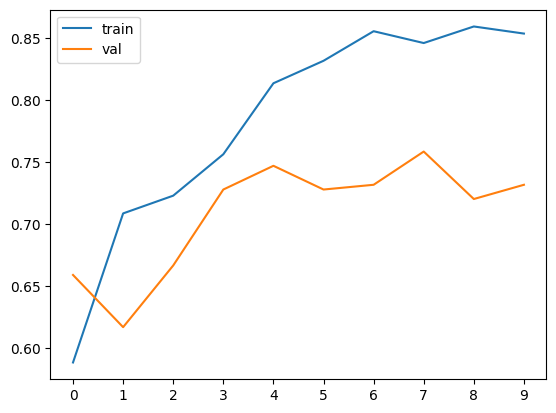

In [131]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# **Adjust Learning Rate**

In [19]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(2)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [21]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
33/33 [==============================] - 14s 186ms/step - loss: 3.4244 - accuracy: 0.5587 - val_loss: 2.2722 - val_accuracy: 0.5862
Epoch 2/10
33/33 [==============================] - 4s 125ms/step - loss: 2.4495 - accuracy: 0.5578 - val_loss: 1.8496 - val_accuracy: 0.6245
Epoch 3/10
33/33 [==============================] - 3s 85ms/step - loss: 2.0360 - accuracy: 0.5731 - val_loss: 1.6311 - val_accuracy: 0.6398
Epoch 4/10
33/33 [==============================] - 3s 84ms/step - loss: 1.8411 - accuracy: 0.6065 - val_loss: 1.5301 - val_accuracy: 0.6590
Epoch 5/10
33/33 [==============================] - 4s 110ms/step - loss: 1.6966 - accuracy: 0.6113 - val_loss: 1.5191 - val_accuracy: 0.6590
Epoch 6/10
33/33 [==============================] - 3s 93ms/step - loss: 1.5439 - accuracy: 0.6227 - val_loss: 1.4228 - val_accuracy: 0.6858
Epoch 7/10
33/33 [==============================] - 3s 85ms/step - loss: 1.4550 - accuracy: 0.6342 - val_loss: 1.3895 - val_accuracy: 0.6705
Ep

In [23]:
learning_rate = 0.001
del scores[0.1]


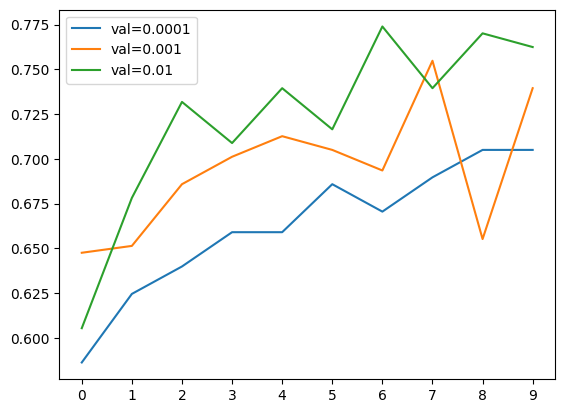

In [24]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

# **Additional Layers**

In [23]:
def make_model(learning_rate=0.01,size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(2)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [25]:
learning_rate = 0.01

scores = {}

# List of inner layer sizes
sizes = [40,50,100,1000]

for size in sizes:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)
    scores[size] = history.history

    print()


40
Epoch 1/10
33/33 [==============================] - 8s 136ms/step - loss: 6.1833 - accuracy: 0.6113 - val_loss: 3.6627 - val_accuracy: 0.5747
Epoch 2/10
33/33 [==============================] - 3s 80ms/step - loss: 1.6015 - accuracy: 0.7287 - val_loss: 1.0546 - val_accuracy: 0.7395
Epoch 3/10
33/33 [==============================] - 3s 81ms/step - loss: 0.6607 - accuracy: 0.8023 - val_loss: 0.8564 - val_accuracy: 0.6973
Epoch 4/10
33/33 [==============================] - 3s 80ms/step - loss: 0.7861 - accuracy: 0.7708 - val_loss: 1.1918 - val_accuracy: 0.7203
Epoch 5/10
33/33 [==============================] - 4s 114ms/step - loss: 0.5125 - accuracy: 0.8233 - val_loss: 0.9069 - val_accuracy: 0.7816
Epoch 6/10
33/33 [==============================] - 3s 79ms/step - loss: 0.3385 - accuracy: 0.8586 - val_loss: 0.7689 - val_accuracy: 0.7816
Epoch 7/10
33/33 [==============================] - 3s 81ms/step - loss: 0.3475 - accuracy: 0.8672 - val_loss: 0.7413 - val_accuracy: 0.7701
Epoch 8/

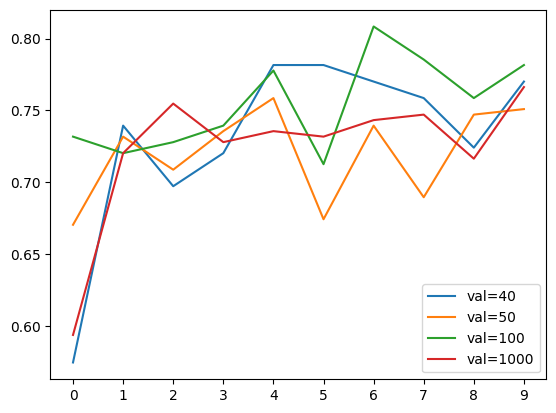

In [27]:
for size, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % size))
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

# **Regularization**

In [28]:
def make_model(learning_rate=0.01,size_inner=100,drop_rate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(drop_rate)(inner)
    outputs = keras.layers.Dense(2)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [31]:
# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100

# Dict to store results
scores = {}

# List of dropout rates
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)

    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       drop_rate=droprate)

    # Train for longer (epochs=30) cause of dropout regularization
    history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
33/33 [==============================] - 8s 109ms/step - loss: 13.4424 - accuracy: 0.5989 - val_loss: 1.7383 - val_accuracy: 0.7203
Epoch 2/30
33/33 [==============================] - 3s 79ms/step - loss: 0.9091 - accuracy: 0.7326 - val_loss: 0.6851 - val_accuracy: 0.7586
Epoch 3/30
33/33 [==============================] - 3s 79ms/step - loss: 0.4857 - accuracy: 0.7966 - val_loss: 0.6780 - val_accuracy: 0.7395
Epoch 4/30
33/33 [==============================] - 3s 88ms/step - loss: 0.4105 - accuracy: 0.8271 - val_loss: 0.5949 - val_accuracy: 0.7663
Epoch 5/30
33/33 [==============================] - 3s 90ms/step - loss: 0.3655 - accuracy: 0.8348 - val_loss: 0.6299 - val_accuracy: 0.7510
Epoch 6/30
33/33 [==============================] - 3s 95ms/step - loss: 0.3764 - accuracy: 0.8472 - val_loss: 0.6681 - val_accuracy: 0.7318
Epoch 7/30
33/33 [==============================] - 3s 81ms/step - loss: 0.3595 - accuracy: 0.8510 - val_loss: 0.5951 - val_accuracy: 0.7701
Epoch 8

# **Augmentation**

In [18]:

train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=10.0,
                                      height_shift_range=10.0,
                                      # horizontal_flip=True,
                                      shear_range=10,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [19]:
def make_model(learning_rate=0.01,size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(2)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [20]:

# Create checkpoint to save best model for version 3
filepath = './xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100



model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)


Epoch 1/30
33/33 [==============================] - 14s 315ms/step - loss: 12.3014 - accuracy: 0.5931 - val_loss: 2.5148 - val_accuracy: 0.4598
Epoch 2/30
33/33 [==============================] - 9s 274ms/step - loss: 0.9459 - accuracy: 0.6848 - val_loss: 0.6775 - val_accuracy: 0.7050
Epoch 3/30
33/33 [==============================] - 9s 276ms/step - loss: 0.5490 - accuracy: 0.7440 - val_loss: 0.5883 - val_accuracy: 0.7088
Epoch 4/30
33/33 [==============================] - 9s 276ms/step - loss: 0.4841 - accuracy: 0.7899 - val_loss: 0.5519 - val_accuracy: 0.7739
Epoch 5/30
33/33 [==============================] - 8s 237ms/step - loss: 0.4968 - accuracy: 0.7593 - val_loss: 0.6468 - val_accuracy: 0.7510
Epoch 6/30
33/33 [==============================] - 9s 277ms/step - loss: 0.5211 - accuracy: 0.7755 - val_loss: 0.5267 - val_accuracy: 0.7471
Epoch 7/30
33/33 [==============================] - 9s 285ms/step - loss: 0.4678 - accuracy: 0.7841 - val_loss: 0.5115 - val_accuracy: 0.7510
Epoc

**Augmentation with different inputs**

In [21]:

train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      # horizontal_flip=True,
                                      shear_range=5.0,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [22]:

# Create checkpoint to save best model for version 3
filepath = './xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100



model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
33/33 [==============================] - 12s 258ms/step - loss: 15.1424 - accuracy: 0.5759 - val_loss: 0.6890 - val_accuracy: 0.5939
Epoch 2/30
33/33 [==============================] - 9s 281ms/step - loss: 0.6698 - accuracy: 0.6132 - val_loss: 0.6420 - val_accuracy: 0.6513
Epoch 3/30
33/33 [==============================] - 9s 276ms/step - loss: 0.6527 - accuracy: 0.6466 - val_loss: 0.6178 - val_accuracy: 0.6782
Epoch 4/30
33/33 [==============================] - 8s 232ms/step - loss: 0.6321 - accuracy: 0.6638 - val_loss: 0.6201 - val_accuracy: 0.6858
Epoch 5/30
33/33 [==============================] - 9s 280ms/step - loss: 0.6297 - accuracy: 0.6714 - val_loss: 0.5936 - val_accuracy: 0.6973
Epoch 6/30
33/33 [==============================] - 9s 279ms/step - loss: 0.6034 - accuracy: 0.6839 - val_loss: 0.5870 - val_accuracy: 0.7050
Epoch 7/30
33/33 [==============================] - 8s 236ms/step - loss: 0.5858 - accuracy: 0.6877 - val_loss: 0.5784 - val_accuracy: 0.7165
Epoc

# **Saving the best model **

In [25]:

train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=10.0,
                                      height_shift_range=10.0,
                                      horizontal_flip=True,
                                      shear_range=10,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [27]:

# Create checkpoint to save best model for version 3
filepath = './xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100



model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset,callbacks=[checkpoint])

Epoch 1/30
33/33 [==============================] - 13s 300ms/step - loss: 12.5815 - accuracy: 0.5788 - val_loss: 1.4373 - val_accuracy: 0.6552
Epoch 2/30
33/33 [==============================] - 8s 243ms/step - loss: 0.8397 - accuracy: 0.6781 - val_loss: 0.6251 - val_accuracy: 0.6935
Epoch 3/30
33/33 [==============================] - 10s 291ms/step - loss: 0.5939 - accuracy: 0.7364 - val_loss: 0.5970 - val_accuracy: 0.7088
Epoch 4/30
33/33 [==============================] - 9s 276ms/step - loss: 0.5533 - accuracy: 0.7192 - val_loss: 0.5630 - val_accuracy: 0.7088
Epoch 5/30
33/33 [==============================] - 9s 279ms/step - loss: 0.5222 - accuracy: 0.7555 - val_loss: 0.5563 - val_accuracy: 0.7356
Epoch 6/30
33/33 [==============================] - 8s 235ms/step - loss: 0.5356 - accuracy: 0.7488 - val_loss: 0.5528 - val_accuracy: 0.7241
Epoch 7/30
33/33 [==============================] - 9s 285ms/step - loss: 0.5084 - accuracy: 0.7536 - val_loss: 0.5835 - val_accuracy: 0.7471
Epo

# **Train Larger Model**

In [28]:
train_image_generator = ImageDataGenerator(rotation_range = 20,
                                     width_shift_range=10.0,
                                      height_shift_range=10.0,
                                      horizontal_flip=True,
                                      shear_range=10,
                                      zoom_range=0.1,
                                      validation_split=0.2)


validation_image_generator = ImageDataGenerator(validation_split=0.2)
train_dataset = train_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(299, 299),
                                                 subset="training",

                                                 class_mode='categorical')

validation_dataset = validation_image_generator.flow_from_directory(batch_size=32,
                                                 directory='./images',
                                                 target_size=(150, 150),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1047 images belonging to 2 classes.
Found 261 images belonging to 2 classes.


In [29]:

# Create checkpoint to save best model for version 3
filepath = './xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')



# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.01
size = 100



model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                    )

    # Train for longer (epochs=30) cause of dropout regularization
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset,callbacks=[checkpoint])

Epoch 1/30
33/33 [==============================] - 80s 932ms/step - loss: 24.8430 - accuracy: 0.6390 - val_loss: 7.7432 - val_accuracy: 0.6782
Epoch 2/30
33/33 [==============================] - 27s 818ms/step - loss: 3.8018 - accuracy: 0.7564 - val_loss: 4.0492 - val_accuracy: 0.7088
Epoch 3/30
33/33 [==============================] - 27s 824ms/step - loss: 2.6840 - accuracy: 0.7469 - val_loss: 1.8083 - val_accuracy: 0.7241
Epoch 4/30
33/33 [==============================] - 27s 829ms/step - loss: 1.2147 - accuracy: 0.7660 - val_loss: 1.1783 - val_accuracy: 0.7241
Epoch 5/30
33/33 [==============================] - 28s 840ms/step - loss: 1.0987 - accuracy: 0.7794 - val_loss: 1.1345 - val_accuracy: 0.7050
Epoch 6/30
33/33 [==============================] - 27s 809ms/step - loss: 0.8481 - accuracy: 0.7899 - val_loss: 0.7425 - val_accuracy: 0.6552
Epoch 7/30
33/33 [==============================] - 27s 824ms/step - loss: 0.4779 - accuracy: 0.8061 - val_loss: 0.6689 - val_accuracy: 0.693

Transfer Learning with different architecture- **MobilNet**